# Figure 4 Data Generation

This notebook processes raw shuttling experimental data to generate processed data for Figure 4.

## Process:
1. Load raw experimental data from UUIDs
2. Process data (extract amplitudes, fit decay curves)
3. Save processed data for plotting


In [2]:
# Import common utilities
import sys
from pathlib import Path

# Add common directory to path (works in Jupyter notebooks)
common_path = Path().resolve().parent / 'common_scripts'
sys.path.insert(0, str(common_path))

from raw_data_loader import load_raw_data_by_uuid
from data_processor import analyze_ramsey, analyze_echo_lowfield, exp_decay, exp_decay_nob
from data_saver import save_figure_data
import numpy as np


data_path = Path().resolve().parent / 'data'
# Data path

figure_path = Path().resolve().parent / 'figures'

# Processed data path (absolute path to data_analysis/processed_data)
processed_data_path = Path().resolve().parent / 'processed_data'

# Alias for convenience
load_by_uuid = load_raw_data_by_uuid


## Load Raw Data: High Field Measurements


In [3]:
# Load Ramsey measurements
ramsey_uuids = [1729338584952108893, 1729339566126108893, 1729344237793108893, 1729345221575108893,
                1729346193883108893, 1729347175505108893, 1729348213411108893, 1729349391259108893, 
                1729350751425108893]

ramsey_datasets = [load_by_uuid(uuid, data_path) for uuid in ramsey_uuids]

# Load Echo (CPMG N=1) measurements  
echo_uuids = [1729352661379108893, 1729353663655108893, 1729354825558108893, 1729355882400108893,
              1729357060736108893, 1729358250009108893, 1729359473186108893, 1729360813701108893,
              1729362400622108893, 1729364398847108893]

echo_datasets = [load_by_uuid(uuid, data_path) for uuid in echo_uuids]

# Load CPMG N=3 measurements
cpmg5_uuids = [1729385219679108893, 1729386520050108893, 1729388016259108893, 1729389395062108893,
               1729390966230108893, 1729392586241108893, 1729394301840108893, 1729396250369108893,
               1729398660810108893, 1729401870913108893]

cpmg5_datasets = [load_by_uuid(uuid, data_path) for uuid in cpmg5_uuids]

print(f"Loaded {len(ramsey_datasets)} Ramsey datasets")
print(f"Loaded {len(echo_datasets)} Echo datasets")  
print(f"Loaded {len(cpmg5_datasets)} CPMG-3 datasets")


Loaded 9 Ramsey datasets
Loaded 10 Echo datasets
Loaded 10 CPMG-3 datasets


In [4]:
# Analysis parameters
cv_time = 20.0
ramsey_cv_stops = [2, 4, 6, 8, 10, 12, 14, 16, 18]
echo_cv_stops = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
cpmg5_cv_stops = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

# Calculate shuttling distances
shuttle_distance_ramsey = (cv_time - np.array(ramsey_cv_stops)) * 0.06 * 180
shuttle_distance_echo = (cv_time - np.array(echo_cv_stops)) * 0.06 * 180
shuttle_distance_cpmg5 = (cv_time - np.array(cpmg5_cv_stops)) * 0.06 * 180

fit_b = True


In [5]:
# --- Ramsey Analysis ---
n_pipulse_ramsey = 0
ramsey_results = []
print("--- Analyzing Ramsey (High Field) ---")
for nit, (cv_stop, dataset) in enumerate(zip(ramsey_cv_stops, ramsey_datasets)):
    if dataset is None:
        print(f"Warning: Dataset for cv_stop={cv_stop} is None. Skipping.")
        ramsey_results.append(None)
        continue
    try:
        A, A_err, T, T_err, n, n_err, x, y, popt = analyze_ramsey(
            dataset, n_pipulse_ramsey, cv_time, cv_stop, fit_b=fit_b
        )
        ramsey_results.append({
            'cv_stop': cv_stop, 
            'dx': shuttle_distance_ramsey[nit],
            'Amplitude': A, 'Amplitude_err': A_err,
            'Decay time': T, 'Decay time_err': T_err,
            'Exponent': n, 'Exponent_err': n_err,
            'x_data': x, 'amplitudes': y, 'fit_params': popt
        })
        if not np.isnan(T):
            print(f"Ramsey {cv_stop}ns: T={T:.2f}±{T_err:.2f} ns, n={n:.2f}±{n_err:.2f}")
        else:
            print(f"Ramsey {cv_stop}ns: Fit failed.")
    except Exception as e:
        print(f"Ramsey {cv_stop}ns: Error - {e}")
        ramsey_results.append(None)


--- Analyzing Ramsey (High Field) ---
Ramsey 2ns: T=5166.76±658.49 ns, n=1.59±0.19
Ramsey 4ns: T=6245.32±2122.95 ns, n=1.76±0.33
Ramsey 6ns: T=5838.96±449.16 ns, n=1.58±0.16
Ramsey 8ns: T=5131.65±252.47 ns, n=1.79±0.17
Ramsey 10ns: T=4111.88±98.37 ns, n=1.81±0.11
Ramsey 12ns: T=3271.01±168.04 ns, n=1.99±0.29
Ramsey 14ns: T=3662.12±100.26 ns, n=1.97±0.15
Ramsey 16ns: T=3953.25±90.64 ns, n=2.09±0.14
Ramsey 18ns: T=5575.52±264.43 ns, n=1.97±0.18


In [6]:
# --- Echo Analysis (CPMG N=1) ---
n_pipulse_echo = 1
echo_results = []
print("\n--- Analyzing Echo (CPMG N=1) High Field ---")
for nit, (cv_stop, dataset) in enumerate(zip(echo_cv_stops, echo_datasets)):
    if dataset is None:
        print(f"Warning: Dataset for cv_stop={cv_stop} is None. Skipping.")
        echo_results.append(None)
        continue
    try:
        A, A_err, T, T_err, n, n_err, x, y, popt = analyze_ramsey(
            dataset, n_pipulse_echo, cv_time, cv_stop, fit_b=fit_b
        )
        echo_results.append({
            'cv_stop': cv_stop, 
            'dx': shuttle_distance_echo[nit],
            'Amplitude': A, 'Amplitude_err': A_err,
            'Decay time': T, 'Decay time_err': T_err,
            'Exponent': n, 'Exponent_err': n_err,
            'x_data': x, 'amplitudes': y, 'fit_params': popt
        })
        if not np.isnan(T):
            print(f"Echo {cv_stop}ns: T={T:.2f}±{T_err:.2f} ns, n={n:.2f}±{n_err:.2f}")
        else:
            print(f"Echo {cv_stop}ns: Fit failed.")
    except Exception as e:
        print(f"Echo {cv_stop}ns: Error - {e}")
        echo_results.append(None)



--- Analyzing Echo (CPMG N=1) High Field ---
Echo 0ns: T=11192.85±648.88 ns, n=1.56±0.12
Echo 2ns: T=13781.04±1268.15 ns, n=1.46±0.11
Echo 4ns: T=17710.49±4184.02 ns, n=1.63±0.22
Echo 6ns: T=15764.93±2769.01 ns, n=1.58±0.20
Echo 8ns: T=13083.55±1015.02 ns, n=1.93±0.19
Echo 10ns: T=9283.51±139.70 ns, n=2.05±0.08
Echo 12ns: T=6845.27±189.23 ns, n=1.85±0.14
Echo 14ns: T=7152.61±128.64 ns, n=2.01±0.10
Echo 16ns: T=7433.71±101.38 ns, n=2.63±0.13
Echo 18ns: T=14005.88±467.56 ns, n=2.63±0.15


In [7]:
# --- CPMG N=3 Analysis ---
n_pipulse_cpmg = 3
cpmg5_results_list = []
print("\n--- Analyzing CPMG N=3 (High Field) ---")
for nit, (cv_stop, dataset) in enumerate(zip(cpmg5_cv_stops, cpmg5_datasets)):
    if dataset is None:
        print(f"Warning: Dataset for cv_stop={cv_stop} is None. Skipping.")
        cpmg5_results_list.append(None)
        continue
    try:
        A, A_err, T, T_err, n, n_err, x, y, popt = analyze_ramsey(
            dataset, n_pipulse_cpmg, cv_time, cv_stop, fit_b=fit_b
        )
        cpmg5_results_list.append({
            'cv_stop': cv_stop,
            'dx': shuttle_distance_cpmg5[nit],
            'Amplitude': A, 'Amplitude_err': A_err,
            'Decay time': T, 'Decay time_err': T_err,
            'Exponent': n, 'Exponent_err': n_err,
            'x_data': x, 'amplitudes': y, 'fit_params': popt
        })
        if not np.isnan(T):
            print(f"CPMG-3 {cv_stop}ns: T={T:.2f}±{T_err:.2f} ns, n={n:.2f}±{n_err:.2f}")
        else:
            print(f"CPMG-3 {cv_stop}ns: Fit failed.")
    except Exception as e:
        print(f"CPMG-3 {cv_stop}ns: Error - {e}")
        cpmg5_results_list.append(None)



--- Analyzing CPMG N=3 (High Field) ---
CPMG-3 0ns: T=15948.65±2158.92 ns, n=1.11±0.24
CPMG-3 2ns: T=15976.40±1350.70 ns, n=1.23±0.19
CPMG-3 4ns: T=20869.52±1021.32 ns, n=3.05±0.57
CPMG-3 6ns: T=21192.89±1796.42 ns, n=1.58±0.21
CPMG-3 8ns: T=17102.52±1148.04 ns, n=2.13±0.42
CPMG-3 10ns: T=13602.48±415.72 ns, n=2.34±0.23
CPMG-3 12ns: T=9691.31±375.25 ns, n=2.86±0.45
CPMG-3 14ns: T=11263.92±362.13 ns, n=3.66±0.60
CPMG-3 16ns: T=13051.25±496.81 ns, n=5.48±1.52
CPMG-3 18ns: T=18106.67±616.78 ns, n=2.63±0.31


<>:132: SyntaxWarning: invalid escape sequence '\m'
<>:132: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_85494/2548383107.py:132: SyntaxWarning: invalid escape sequence '\m'
  ax_c.set_xlabel('Time ($\mu$s)')


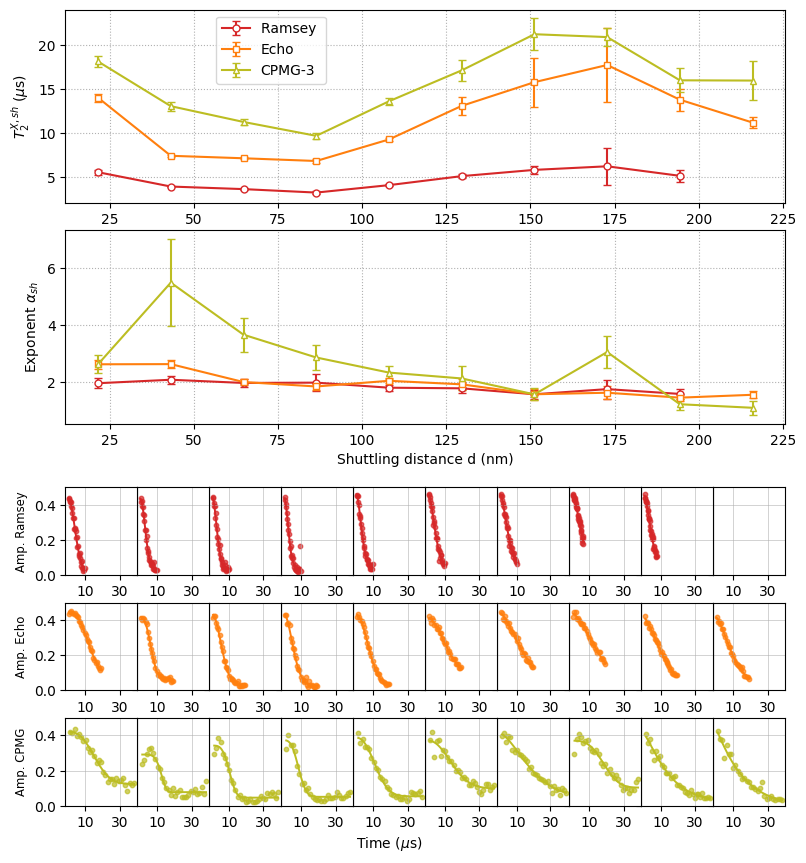

In [22]:
# Plot high field results
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def exp_decay(x, A, T, n, B):
    if T == 0: return np.zeros_like(x) + A
    with np.errstate(over='ignore'):
        term = np.clip(-(x / T)**n, -700, 700)
        return A * np.exp(term) + B

# Color definitions
dark_pink = "#d72660"
ramsey_color = "tab:red"
echo_color = "tab:orange"
cpmg_color = "tab:olive"

# Filter out None results
valid_ramsey = [r for r in ramsey_results if r is not None]
valid_echo = [r for r in echo_results if r is not None]
valid_cpmg = [r for r in cpmg5_results_list if r is not None]

N_cols = len(valid_echo)  # Use echo as reference for columns

if N_cols == 0:
    print("No analysis results to plot.")
else:
    # Prepare data
    r_cv_stops = [r['cv_stop'] for r in valid_ramsey]
    r_T = [r['Decay time']/1000 for r in valid_ramsey]
    r_T_err = [r['Decay time_err']/1000 for r in valid_ramsey]
    r_n = [r['Exponent'] for r in valid_ramsey]
    r_n_err = [r['Exponent_err'] for r in valid_ramsey]

    e_cv_stops = [r['cv_stop'] for r in valid_echo]
    e_T = [r['Decay time']/1000 for r in valid_echo]
    e_T_err = [r['Decay time_err']/1000 for r in valid_echo]
    e_n = [r['Exponent'] for r in valid_echo]
    e_n_err = [r['Exponent_err'] for r in valid_echo]

    c_cv_stops = [r['cv_stop'] for r in valid_cpmg]
    c_T = [r['Decay time']/1000 for r in valid_cpmg]
    c_T_err = [r['Decay time_err']/1000 for r in valid_cpmg]
    c_n = [r['Exponent'] for r in valid_cpmg]
    c_n_err = [r['Exponent_err'] for r in valid_cpmg]

    # GridSpec Definition with height_ratios
    nrows_logical = 6
    height_ratios_logical = [2.2, 2.2, 0.1, 1, 1, 1]

    fig = plt.figure(figsize=(8, 7.5/6.5*7.5))
    gs = gridspec.GridSpec(nrows_logical, N_cols, figure=fig,
                           height_ratios=height_ratios_logical,
                           hspace=0.25, wspace=0.0)

    # Row 1: Decay Times (Occupies logical row 0)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.errorbar(shuttle_distance_ramsey, r_T, yerr=r_T_err, fmt='o-', color=ramsey_color,
                 ecolor=ramsey_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=ramsey_color, label='Ramsey ')
    ax1.errorbar(shuttle_distance_echo, e_T, yerr=e_T_err, fmt='s-', color=echo_color,
                 ecolor=echo_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=echo_color, label='Echo')
    ax1.errorbar(shuttle_distance_cpmg5, c_T, yerr=c_T_err, fmt='^-', color=cpmg_color,
                 ecolor=cpmg_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=cpmg_color, label='CPMG-3')
    ax1.set_ylabel(r'$T_{2}^{X,sh}$ ($\mu$s)')
    ax1.legend(loc="upper left", bbox_to_anchor=(0.2, 1))
    ax1.grid(True, linestyle=':')

    # Row 2: Exponents (Occupies logical row 1)
    ax2 = fig.add_subplot(gs[1, :], sharex=ax1)
    ax2.errorbar(shuttle_distance_ramsey, r_n, yerr=r_n_err, fmt='o-', color=ramsey_color,
                 ecolor=ramsey_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=ramsey_color)
    ax2.errorbar(shuttle_distance_echo, e_n, yerr=e_n_err, fmt='s-', color=echo_color,
                 ecolor=echo_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=echo_color)
    ax2.errorbar(shuttle_distance_cpmg5, c_n, yerr=c_n_err, fmt='^-', color=cpmg_color,
                 ecolor=cpmg_color, capsize=3, markersize=5, markerfacecolor='white', markeredgecolor=cpmg_color)
    ax2.set_ylabel(r'Exponent $\alpha_{sh}$')
    ax2.grid(True, linestyle=':')
    ax2.set_xlabel('Shuttling distance d (nm)')

    # Rows 3, 4, 5: Individual Decays
    for i in range(N_cols):
        col = len(valid_echo) - i - 1  # Reverse order for plotting
        current_cv_stop = e_cv_stops[i]

        # Find corresponding data, handling potential misalignment/missing data
        if i==0:
            r_data = None
        else:
            r_data = valid_ramsey[i-1] if i-1 < len(valid_ramsey) else None
        e_data = valid_echo[i] if i < len(valid_echo) else None
        c_data = valid_cpmg[i] if i < len(valid_cpmg) else None
        
        # Ramsey Plot (Logical Row 3, Column col)
        ax_r = fig.add_subplot(gs[3, col])
        if r_data and len(r_data.get('x_data', [])) > 0:
             ax_r.scatter(r_data['x_data'], r_data['amplitudes'], label='Data', s=10, alpha=0.7, color=ramsey_color)
             # Check fit_params exist and are not None/NaN before plotting fit
             if r_data.get('fit_params') is not None and not np.any(np.isnan(r_data['fit_params'])):
                 fit_x = np.linspace(min(r_data['x_data']), max(r_data['x_data']), 100)
                 fit_y = exp_decay(fit_x, *r_data['fit_params'])
                 ax_r.plot(fit_x, fit_y, color=ramsey_color, lw=1.4, label=f'Fit T={r_data["Decay time"]:.1f}, n={r_data["Exponent"]:.2f}')
        if i == N_cols-1:
            ax_r.set_ylabel('Amp. Ramsey', fontsize='small')
        ax_r.grid(True, linestyle='-', lw=0.4)
        ax_r.set_ylim(0,0.5)

        # Echo Plot (Logical Row 4, Column col)
        ax_e = fig.add_subplot(gs[4, col], sharex=ax_r)
        if e_data and len(e_data.get('x_data', [])) > 0:
            ax_e.scatter(e_data['x_data'], e_data['amplitudes'], label='Data', s=10, alpha=0.7, color=echo_color)
            if e_data.get('fit_params') is not None and not np.any(np.isnan(e_data['fit_params'])):
                fit_x = np.linspace(min(e_data['x_data']), max(e_data['x_data']), 100)
                fit_y = exp_decay(fit_x, *e_data['fit_params'])
                ax_e.plot(fit_x, fit_y, color=echo_color, lw=1.4, label=f'Fit T={e_data["Decay time"]:.1f}, n={e_data["Exponent"]:.2f}')
    
        ax_e.grid(True, linestyle='-', lw=0.4)
        ax_e.set_ylim(0,0.5)

        # CPMG Plot (Logical Row 5, Column col)
        ax_c = fig.add_subplot(gs[5, col], sharex=ax_r)
        if c_data and len(c_data.get('x_data', [])) > 0:
            ax_c.scatter(c_data['x_data'], c_data['amplitudes'], label='Data', s=10, alpha=0.7, color=cpmg_color)
            if c_data.get('fit_params') is not None and not np.any(np.isnan(c_data['fit_params'])):
                fit_x = np.linspace(min(c_data['x_data']), max(c_data['x_data']), 100)
                fit_y = exp_decay(fit_x, *c_data['fit_params'])
                ax_c.plot(fit_x, fit_y, color=cpmg_color, lw=1.4, label=f'Fit T={c_data["Decay time"]:.1f}, n={c_data["Exponent"]:.2f}')
        else:
            ax_c.set_title(f'CPMG-{n_pipulse_cpmg}: {current_cv_stop}ns', fontsize='small')
        ax_c.set_xticks([10000,30000])
        ax_c.set_xticklabels([10,30])
        # Set x-label ONLY on the bottom-most plot in the column
        if i==N_cols//2:
            ax_c.set_xlabel('Time ($\mu$s)')

        if i== N_cols-1:
            ax_e.set_ylabel('Amp. Echo', fontsize='small')
            ax_c.set_ylabel('Amp. CPMG', fontsize='small')
            ax_e.set_yticks([0,.2,0.4])
            ax_c.set_yticks([0,.2,0.4])
            ax_r.set_yticks([0,.2,0.4])
        else:
            plt.setp(ax_e.get_yticklabels(), visible=False)
            plt.setp(ax_c.get_yticklabels(), visible=False)
            plt.setp(ax_r.get_yticklabels(), visible=False)
        ax_e.set_ylim(0,0.5)
        ax_c.set_ylim(0,0.5)
        ax_r.set_ylim(0,0.5)
        ax_c.grid(True, linestyle='-', lw=0.4)

    # Adjust layout AFTER adding all plots
    plt.subplots_adjust(top=0.99, right = 0.98, bottom = 0.07, left = 0.08)
    plt.savefig(f'{figure_path}/app_shuttlingdata_high_field.pdf')
    plt.show()


In [9]:
# Save high field results
shuttling_results_high = {
    "Ramsey": [r for r in ramsey_results if r is not None],
    "Echo": [r for r in echo_results if r is not None],
    "CPMG-3": [r for r in cpmg5_results_list if r is not None]
}

metadata_high = {
    "cv_time": cv_time,
    "field": "high",
    "ramsey_cv_stops": ramsey_cv_stops,
    "echo_cv_stops": echo_cv_stops,
    "cpmg5_cv_stops": cpmg5_cv_stops,
    "processing_date": str(np.datetime64('today'))
}

save_path_high = save_figure_data(
    shuttling_results_high,
    figure_number="fig4",
    filename="shuttling_high",
    metadata=metadata_high,
    base_path=str(processed_data_path)
)

print(f"\nSaved high field data to: {save_path_high}")


✓ Saved fig4 data to /Users/krzywdaja/Documents/spatial-correlations-conveyor/data_analysis/protection_code_repo/processed_data/fig4/shuttling_high.pkl
  Metadata saved to /Users/krzywdaja/Documents/spatial-correlations-conveyor/data_analysis/protection_code_repo/processed_data/fig4/shuttling_high.json

Saved high field data to: /Users/krzywdaja/Documents/spatial-correlations-conveyor/data_analysis/protection_code_repo/processed_data/fig4/shuttling_high.pkl


## Load Raw Data: Low Field Measurements


In [10]:
# Load Ramsey measurements at low field
ramsey_lowfield_uuids = [1730940202072108893, 1730941343072108893, 1730942584475108893, 1730943887312108893,
                         1730945170404108893, 1730946652994108893, 1730948306204108893, 1730950465416108893,
                         1730953832558108893, 1730960802231108893]

ramsey_lowfield_datasets = [load_by_uuid(uuid, data_path) for uuid in ramsey_lowfield_uuids]

# Load Echo measurements at low field
echo_lowfield_uuids = [1731109791402108893, 1731110194512108893, 1731157390362108893, 1731111008523108893,
                       1731111405100108893, 1731111798080108893, 1731112213009108893, 1731123163848108893,
                       1731113018316108893, 1731124498180108893]

echo_lowfield_datasets_list = [load_by_uuid(uuid, data_path) for uuid in echo_lowfield_uuids]

# Organize echo lowfield datasets by cv_stop
echo_lowfield_cv_stops = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
echo_lowfield_datasets = dict(zip(echo_lowfield_cv_stops, echo_lowfield_datasets_list))

cv_stops_lowfield = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
ramsey_lowfield_datasets_filtered = ramsey_lowfield_datasets
print(f"Loaded {len(ramsey_lowfield_datasets_filtered)} Ramsey low field datasets")
print(f"Loaded {len(echo_lowfield_datasets)} Echo low field datasets")


Loaded 10 Ramsey low field datasets
Loaded 10 Echo low field datasets


In [11]:
n_pipulse = 0
cv_time = 20
cv_stop = 2
n_pipulse_ramsey = 0
results_lowfield = []
print("--- Analyzing Ramsey (Low Field) ---")
shuttle_distance_ramsey_low = (cv_time - np.array(cv_stops_lowfield)) * 0.06 * 180

for nit, (cv_stop, dataset) in enumerate(zip(cv_stops_lowfield, ramsey_lowfield_datasets_filtered)):
    if dataset is None:
        print(f"Warning: Dataset for cv_stop={cv_stop} is None. Skipping.")
        results_lowfield.append(None)
        continue
    try:
        A, A_err, T, T_err, n, n_err, x, y, popt = analyze_ramsey(
            dataset, n_pipulse_ramsey, cv_time, cv_stop, measurement="m1_3", fit_b=False
        )
        results_lowfield.append({
            'cv_stop': cv_stop,
            'dx': shuttle_distance_ramsey_low[nit],
            'Amplitude': A, 'Amplitude_err': A_err,
            'Decay time': T, 'Decay time_err': T_err,
            'Exponent': n, 'Exponent_err': n_err,
            'x_data': x, 'amplitudes': y, 'fit_params': popt
        })
        if not np.isnan(T):
            print(f"Ramsey low field {cv_stop}ns: T={T:.2f}±{T_err:.2f} ns, n={n:.2f}±{n_err:.2f}")
        else:
            print(f"Ramsey low field {cv_stop}ns: Fit failed.")
    except Exception as e:
        print(f"Ramsey low field {cv_stop}ns: Error - {e}")
        results_lowfield.append(None)


--- Analyzing Ramsey (Low Field) ---
Ramsey low field 0ns: T=9182.66±1167.36 ns, n=1.00±0.28
Ramsey low field 2ns: T=11511.98±961.38 ns, n=1.90±0.61
Ramsey low field 4ns: T=11240.15±447.49 ns, n=2.00±0.32
Ramsey low field 6ns: T=10729.67±301.63 ns, n=1.72±0.18
Ramsey low field 8ns: T=10015.98±318.05 ns, n=1.97±0.24
Ramsey low field 10ns: T=8696.41±291.05 ns, n=1.74±0.19
Ramsey low field 12ns: T=6934.09±365.43 ns, n=1.35±0.15
Ramsey low field 14ns: T=6252.04±241.93 ns, n=1.50±0.13
Ramsey low field 16ns: T=6338.41±319.54 ns, n=1.38±0.14
Ramsey low field 18ns: T=7741.34±434.60 ns, n=1.30±0.17


In [15]:
# Process Echo low field
results_lowfield_echo = []
print("\n--- Analyzing Echo (Low Field) ---")
shuttle_distance_echo_low = (cv_time - np.array(echo_lowfield_cv_stops)) * 0.06 * 180

for cv_stop, dataset in echo_lowfield_datasets.items():
    if dataset is None:
        print(f"Warning: Dataset for cv_stop={cv_stop} is None. Skipping.")
        continue
    try:
        result = analyze_echo_lowfield(dataset, cv_stop, cv_time)
        if result is not None:
            A, A_err, T, T_err, n, n_err, time_points, amplitudes, popt = result
            idx = echo_lowfield_cv_stops.index(cv_stop)
            results_lowfield_echo.append({
                'cv_stop': cv_stop,
                'dx': shuttle_distance_echo_low[idx],
                'Amplitude': A,
                'Amplitude_err': A_err,
                'Decay time': T,
                'Decay time_err': T_err,
                'Exponent': n,
                'Exponent_err': n_err,
                'x_data': time_points,
                'amplitudes': amplitudes,
                'fit_params': popt
            })
            print(f"Echo low field {cv_stop}ns: T={T:.2f}±{T_err:.2f} ns, n={n:.2f}±{n_err:.2f}")
        else:
            print(f"Echo low field {cv_stop}ns: Fit failed.")
    except Exception as e:
        print(f"Echo low field {cv_stop}ns: Error - {e}")



--- Analyzing Echo (Low Field) ---
Echo low field 0ns: T=31718.90±2362.08 ns, n=1.30±0.28
Echo low field 2ns: T=23976.85±1393.42 ns, n=1.94±0.44
Echo low field 4ns: T=25454.44±714.26 ns, n=2.38±0.28
Echo low field 6ns: T=25351.93±5204.61 ns, n=4.00±2.42
Echo low field 8ns: T=23676.93±2679.28 ns, n=1.13±0.29
Echo low field 10ns: T=17596.64±1722.84 ns, n=1.10±0.28
Echo low field 12ns: T=8366.29±480.90 ns, n=1.83±0.36
Echo low field 14ns: T=9805.90±530.07 ns, n=1.44±0.21
Echo low field 16ns: T=6587.91±379.72 ns, n=3.14±0.62
Echo low field 18ns: T=8942.48±546.41 ns, n=1.89±0.34


<>:108: SyntaxWarning: invalid escape sequence '\m'
<>:108: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_85494/426457770.py:108: SyntaxWarning: invalid escape sequence '\m'
  ax_e.set_xlabel('Time ($\mu$s)')


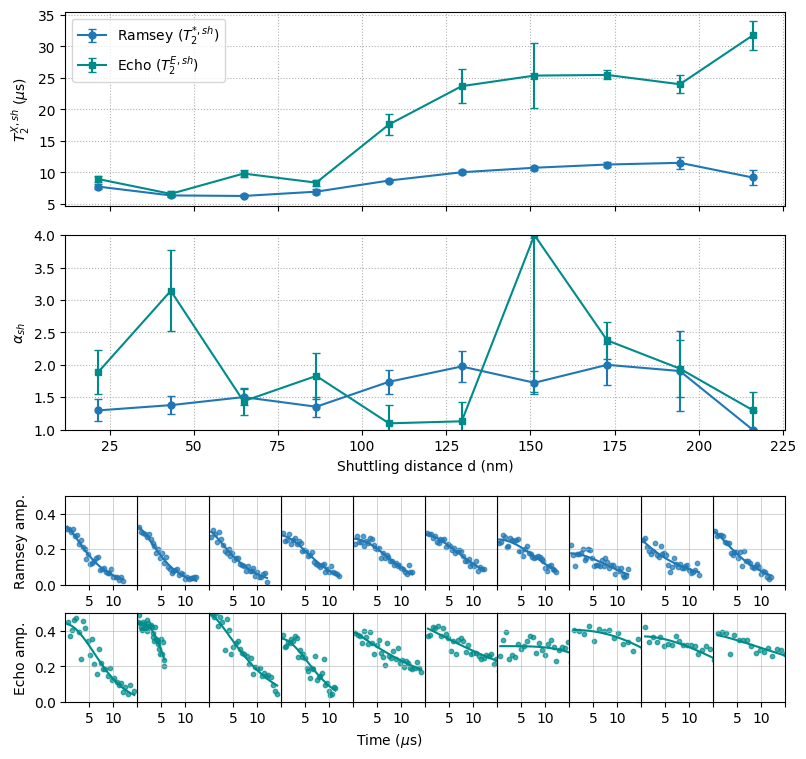

In [23]:
# Plot low field results
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def exp_decay(x, A, T, n):
    if T == 0: return np.zeros_like(x) + A
    with np.errstate(over='ignore'):
        term = np.clip(-(x / T)**n, -700, 700)
        return A * np.exp(term)

ramsey_color = "tab:blue"
echo_color = "darkcyan"

# Extract data from results
valid_ramsey = results_lowfield
valid_echo = results_lowfield_echo

r_cv_stops = [r['cv_stop'] for r in valid_ramsey]
r_T = [r['Decay time'] for r in valid_ramsey]
r_T_err = [r['Decay time_err'] for r in valid_ramsey]
r_n = [r['Exponent'] for r in valid_ramsey]
r_n_err = [r['Exponent_err'] for r in valid_ramsey]
r_dx = [r['dx'] for r in valid_ramsey]

e_cv_stops = [r['cv_stop'] for r in valid_echo]
e_T = [r['Decay time'] for r in valid_echo]
e_T_err = [r['Decay time_err'] for r in valid_echo]
e_n = [r['Exponent'] for r in valid_echo]
e_n_err = [r['Exponent_err'] for r in valid_echo]
e_dx = [r['dx'] for r in valid_echo]

r_T_us = np.array(r_T) / 1000.0
r_T_err_us = np.array(r_T_err) / 1000.0
e_T_us = np.array(e_T) / 1000.0
e_T_err_us = np.array(e_T_err) / 1000.0

N_cols = len(valid_echo)
nrows_logical = 5
height_ratios_logical = [2.2, 2.2, 0.1, 1, 1]

fig = plt.figure(figsize=(8, 7.5/6.5*6.5))
gs = gridspec.GridSpec(nrows_logical, N_cols, figure=fig,
                       height_ratios=height_ratios_logical,
                       hspace=0.25, wspace=0.0)

# Row 1: Decay Times
ax1 = fig.add_subplot(gs[0, :])
ax1.errorbar(r_dx, r_T_us, yerr=r_T_err_us, fmt='o-', label='Ramsey ($T_2^{*,sh}$)', 
             capsize=3, markersize=5, color=ramsey_color)
ax1.errorbar(e_dx, e_T_us, yerr=e_T_err_us, fmt='s-', label='Echo ($T_2^{E,sh}$)', 
             capsize=3, markersize=5, color=echo_color)
ax1.set_ylabel(r'$T_{2}^{X,sh}$ ($\mu$s)')
ax1.legend()
ax1.grid(True, linestyle=':')
ax1.tick_params(labelbottom=False)

# Row 2: Exponents
ax2 = fig.add_subplot(gs[1, :], sharex=ax1)
ax2.errorbar(r_dx, r_n, yerr=r_n_err, fmt='o-', label='Ramsey', capsize=3, 
             markersize=5, color=ramsey_color)
ax2.errorbar(e_dx, e_n, yerr=e_n_err, fmt='s-', label='Echo', capsize=3, 
             markersize=5, color=echo_color)
ax2.set_xlabel('Shuttling distance d (nm)')
ax2.set_ylabel(r'$\alpha_{sh}$')
ax2.grid(True, linestyle=':')
ax2.set_ylim(1, 4)

# Individual decay plots
for i in range(N_cols):
    col = len(valid_echo) - i - 1
    current_cv_stop = e_cv_stops[i]

    r_data = valid_ramsey[i-1] if i-1 < len(valid_ramsey) else None
    e_data = valid_echo[i] if i < len(valid_echo) else None
    
    # Ramsey plot
    ax_r = fig.add_subplot(gs[3, col])
    if i == N_cols-1:
        ax_r.set_ylabel('Ramsey amp.')
        ax_r.set_xticklabels([])
    else:
        ax_r.set_yticklabels([])
    
    if r_data and len(r_data.get('x_data', [])) > 0:
        ramsey_time_us = np.array(r_data['x_data']) / 1000.0
        ax_r.scatter(ramsey_time_us, r_data['amplitudes'], label='Data', s=10, 
                    alpha=0.7, color=ramsey_color)
        if r_data.get('fit_params') is not None and not np.any(np.isnan(r_data['fit_params'])):
            fit_x_ns = np.linspace(min(r_data['x_data']), max(r_data['x_data']), 100)
            fit_y = exp_decay(fit_x_ns, *r_data['fit_params'])
            ax_r.plot(fit_x_ns / 1000.0, fit_y, '-', 
                     label=f'Fit T={r_data["Decay time"]:.1f}, n={r_data["Exponent"]:.2f}', 
                     color=ramsey_color)
    
    ax_r.set_ylim(0, 0.5)
    ax_r.set_xlim(left=0)
    ax_r.set_xticks([5, 10])
    ax_r.grid(True, linestyle='-', lw=0.4)
    
    # Echo plot
    ax_e = fig.add_subplot(gs[4, col], sharex=ax_r)
    if i == N_cols-1:
        ax_e.set_ylabel('Echo amp.')
    else:
        ax_e.set_yticklabels([])
    
    if i == N_cols//2:
        ax_e.set_xlabel('Time ($\mu$s)')
    
    if e_data and len(e_data.get('x_data', [])) > 0:
        echo_time_us = np.array(e_data['x_data']) / 1000.0
        ax_e.scatter(echo_time_us, e_data['amplitudes'], label='Data', s=10, 
                    alpha=0.7, color=echo_color)
        if e_data.get('fit_params') is not None and not np.any(np.isnan(e_data['fit_params'])):
            fit_x_ns = np.linspace(min(e_data['x_data']), max(e_data['x_data']), 100)
            fit_y = exp_decay(fit_x_ns, *e_data['fit_params'])
            ax_e.plot(fit_x_ns / 1000.0, fit_y, '-', 
                     label=f'Fit T={e_data["Decay time"]:.1f}, n={e_data["Exponent"]:.2f}', 
                     color=echo_color)
    
    ax_e.set_xticklabels([5, 10])
    ax_e.set_ylim(0, 0.5)
    ax_e.set_xlim(left=0)
    ax_e.set_xticks([5, 10,15])
    ax_e.grid(True, linestyle='-', lw=0.4)

plt.subplots_adjust(top=0.99, right=0.98, bottom=0.07, left=0.08)
plt.savefig(f"{figure_path}/app_shuttlingdata_low_field.pdf")
plt.show()


In [14]:
# Save low field results
shuttling_results_low = {
    "Ramsey": [r for r in results_lowfield if r is not None],
    "Echo": [r for r in results_lowfield_echo if r is not None]
}

metadata_low = {
    "cv_time": cv_time,
    "field": "low",
    "ramsey_cv_stops": cv_stops_lowfield,
    "echo_cv_stops": echo_lowfield_cv_stops,
    "processing_date": str(np.datetime64('today'))
}

save_path_low = save_figure_data(
    shuttling_results_low,
    figure_number="fig4",
    filename="shuttling_low",
    metadata=metadata_low,
    base_path=str(processed_data_path)
)

print(f"\nSaved low field data to: {save_path_low}")
print("\nData generation complete!")


✓ Saved fig4 data to /Users/krzywdaja/Documents/spatial-correlations-conveyor/data_analysis/protection_code_repo/processed_data/fig4/shuttling_low.pkl
  Metadata saved to /Users/krzywdaja/Documents/spatial-correlations-conveyor/data_analysis/protection_code_repo/processed_data/fig4/shuttling_low.json

Saved low field data to: /Users/krzywdaja/Documents/spatial-correlations-conveyor/data_analysis/protection_code_repo/processed_data/fig4/shuttling_low.pkl

Data generation complete!


## Fig 4 data: effective model

In [20]:
# Spatial correlation fit: Calculate fitted T2 and alpha vs distance
import pickle
import correlation_fun

# Helper function for correlation matrix
def calculate_correlation_matrix(positions, correlation_length):
    """Calculate spatial correlation matrix: C_ij = exp(-|x_i - x_j|/ξ)"""
    n = len(positions)
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            C[i, j] = np.exp(-abs(positions[i] - positions[j]) / correlation_length)
    return C

# Load two-point correlation data from fig23 directory
fig23_path = processed_data_path / 'fig23'
for field in ['high', 'low']:
    # Try to load the data file
    if field == 'high':
        filename = 'fig23_high_75mV.pkl'
    else:
        filename = 'fig23_low.pkl'
    
    filepath = fig23_path / filename
    if not filepath.exists():
        print(f"Warning: Could not find {filepath}")
        continue
    
    with open(filepath, 'rb') as f:
        two_point_data = pickle.load(f)
    
    # Extract chi1 data (T2 and alpha at each position)
    if isinstance(two_point_data, list):
        chi1_data = two_point_data
    elif isinstance(two_point_data, dict):
        chi1_data = two_point_data.get('chi1', two_point_data)
    else:
        continue
    
    # Extract arrays
    x_2point = np.array([p['x'] for p in chi1_data])
    T2_2point = np.array([p['T2'] for p in chi1_data])
    alpha_2point = np.clip(np.array([p['n'] for p in chi1_data]), 1, 2)
    
    # Correlation length (dx): 120 for high, 18 for low
    dx = 120 if field == 'high' else 18
    
    # Calculate fitted lines
    T2_est, alpha_est, x_est = [], [], []
    T2_uncorr, alpha_uncorr = [], []
    
    for N in range(2, min(len(x_2point), 30)):
        if N <= len(T2_2point) and N <= len(alpha_2point):
            # Correlated case
            C1 = calculate_correlation_matrix(x_2point[:N+1], dx)
            t_star, alpha_eff = correlation_fun.calculate_chi_with_background_corrected(
                T2_2point[:N+1], alpha_2point[:N+1], N, C1, 9999999, 2)
            T2_est.append(t_star)
            alpha_est.append(alpha_eff)
            x_est.append(x_2point[N-1] + (x_2point[2]-x_2point[1])/2 if N > 2 else x_2point[N-1])
            
            # Uncorrelated case (delta function correlation)
            C2 = calculate_correlation_matrix(x_2point[:N+1], 1)
            t_star, alpha_eff = correlation_fun.calculate_chi_with_background_corrected(
                T2_2point[:N+1], alpha_2point[:N+1], N, C2, 9999999, 2)
            T2_uncorr.append(t_star)
            alpha_uncorr.append(alpha_eff)
    
    # Save results to fig4 directory (where plotting notebook expects it)
    save_path = processed_data_path / 'fig4' / f"spatial_fit_{field}.pkl"
    with open(save_path, "wb") as f:
        pickle.dump({
            "alpha_est": alpha_est,
            "T2_est": T2_est,
            "x_est": x_est,
            "alpha_uncorr": alpha_uncorr,
            "T2_uncorr": T2_uncorr
        }, f)
    print(f"✓ Saved spatial fit for {field} field to {save_path}")

print("\nSpatial correlation fit complete!")


✓ Saved spatial fit for high field to /Users/krzywdaja/Documents/spatial-correlations-conveyor/data_analysis/protection_code_repo/processed_data/fig4/spatial_fit_high.pkl
✓ Saved spatial fit for low field to /Users/krzywdaja/Documents/spatial-correlations-conveyor/data_analysis/protection_code_repo/processed_data/fig4/spatial_fit_low.pkl

Spatial correlation fit complete!


<>:108: SyntaxWarning: invalid escape sequence '\m'
<>:108: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_92191/249582797.py:108: SyntaxWarning: invalid escape sequence '\m'
  ax_e.set_xlabel('Time ($\mu$s)')


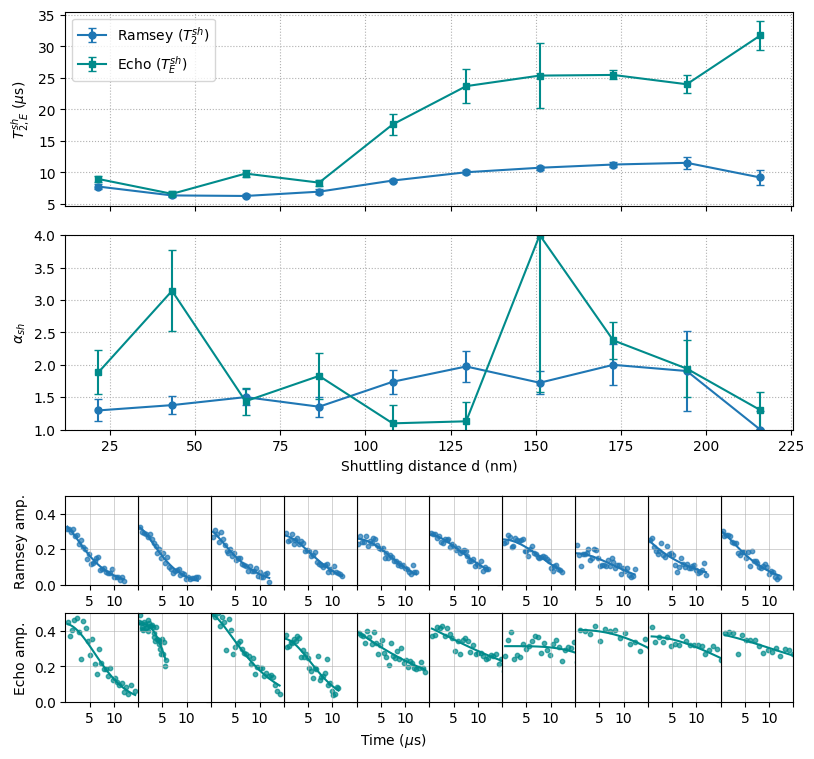